In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
# th architecture to use
arch = 'resnet50'

# load the pre-trained weights
model_file = '%s_places365.pth.tar' % arch
if not os.access(model_file, os.W_OK):
    weight_url = 'http://places2.csail.mit.edu/models_places365/' + model_file
    os.system('wget ' + weight_url)

In [4]:
model = models.__dict__[arch](num_classes=365)
checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
model.load_state_dict(state_dict)
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
# load the image transformer
centre_crop = trn.Compose([
        trn.Resize((256,256)),
        trn.CenterCrop(224),
        trn.ToTensor(),
        trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# load the class label
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
class_dict={}
with open(file_name) as class_file:
    for line in class_file:
        # print(line)
        val1 = line.strip().split(' ')[0][3:]
        val2 = line.strip().split(' ')[1]
        class_dict[val1] = val2
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

In [6]:
# load the test image
img_name = '1.jpg'
if not os.access(img_name, os.W_OK):
    img_url = 'http://places.csail.mit.edu/demo/' + img_name
    os.system('wget ' + img_url)

img = Image.open(img_name)
input_img = V(centre_crop(img).unsqueeze(0))

# forward pass
logit = model(input_img)
h_x = F.softmax(logit, 1).data.squeeze()
probs, idx = h_x.sort(0, True)

print('{} prediction on {}'.format(arch,img_name))
# output the prediction
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

resnet50 prediction on 1.jpg
0.317 -> coast
0.193 -> beach
0.141 -> ocean
0.076 -> field/wild
0.056 -> boardwalk


	Predicted Class: coast


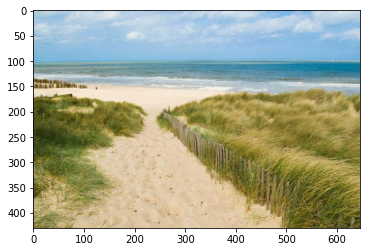

In [7]:
plt.imshow(img)
print('\tPredicted Class:', classes[idx[0]])

In [9]:
image_names = os.listdir('/content/drive/My Drive/00_openvino/interior_image/imagenet_new')
print(len(image_names))

41


In [14]:
# image_names = image_names[1:]
print(image_names)


['art_galary.jpg', 'archive.jpg', 'art_studio.jpg', 'attic.jpg', 'ballroom.jpg', 'basement.jpg', 'balcony.jpg', 'bedroom.jpg', 'bathroom.jpg', 'berth.jpg', 'classroom.jpg', 'closet.jpg', 'conference_room.jpg', 'corridor.jpg', 'dining_room.jpg', 'bow_window.jpg', 'childs_room.jpg', 'dorm_room.jpg', 'computer_room.jpg', 'gymnasium.jpg', 'engine_room.jpg', 'home_theatre.jpg', 'entrance_hall.jpg', 'laundromat.jpg', 'lawn.jpg', 'kitchen.jpg', 'music_studio.jpg', 'locker_room.jpg', 'library.jpg', 'home_office.jpg', 'nursery.jpg', 'parking_lot.jpg', 'patio.jpg', 'porch.jpg', 'living_room.jpg', 'server_room.jpg', 'swimming_pool.jpg', 'operating_room.jpg', 'staircase.jpg', 'office_cubicles.jpg']


In [15]:
for image_name in image_names:
  image = Image.open('/content/drive/My Drive/00_openvino/interior_image/imagenet_new/'+image_name)
  input_image = V(centre_crop(image).unsqueeze(0))

  # forward pass
  logit = model(input_image)
  h_x = F.softmax(logit, 1).data.squeeze()
  probs, idx = h_x.sort(0, True)

  print('\n\n{} prediction on {}'.format(arch,image_name))
  # output the prediction
  for i in range(0, 10):
      print('{}  {:.7f}'.format(classes[idx[i]], probs[i]))



resnet50 prediction on art_galary.jpg
art_gallery  0.5333622
artists_loft  0.2673148
art_studio  0.0891356
museum/indoor  0.0422511
childs_room  0.0161485
art_school  0.0128713
kindergarden_classroom  0.0092929
booth/indoor  0.0036560
classroom  0.0022896
playroom  0.0021744


resnet50 prediction on archive.jpg
archive  0.5335939
storage_room  0.4244727
bookstore  0.0138982
basement  0.0055365
library/indoor  0.0041804
hardware_store  0.0035870
chemistry_lab  0.0013899
physics_laboratory  0.0011180
general_store/indoor  0.0010699
art_studio  0.0010406


resnet50 prediction on art_studio.jpg
gift_shop  0.3263329
general_store/indoor  0.1540415
storage_room  0.1493959
art_studio  0.0620892
pet_shop  0.0415211
kindergarden_classroom  0.0413076
flea_market/indoor  0.0367132
playroom  0.0230991
toyshop  0.0223778
art_school  0.0132263


resnet50 prediction on attic.jpg
attic  0.9977081
stable  0.0010159
artists_loft  0.0004651
mezzanine  0.0001707
entrance_hall  0.0001238
alcove  0.000079

In [13]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import glob
import torch.nn as nn
import os.path as osp
import torchvision
import matplotlib.pyplot as plt



import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
from PIL import Image
#import rotateImage
import cv2
import numpy as np
#import split_folders
import random
import torch.backends.cudnn as cudnn
import torch.optim as optim
from random import choice
from collections import OrderedDict

In [10]:
the_model = torch.load('/content/drive/My Drive/00_openvino/resnet50_places365.pth.tar')

FileNotFoundError: ignored

In [ ]:
type(the_model)

In [ ]:
print(the_model.keys())

In [ ]:
the_model['epoch']

In [ ]:
arch = the_model['arch']

In [9]:
the_model['best_prec1']

NameError: ignored

In [20]:
import torchvision.models as models

def load_model(checkpoint_path):
  arch='resnet50'
  model = models.__dict__[arch](num_classes=365)
  checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
  state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
  model.load_state_dict(state_dict)
  # model.eval()
  model.fc = nn.Sequential(model.fc,nn.Softmax())

  

  # criterion = nn.CrossEntropyLoss()
  # optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

  # net = torchvision.models.resnet50(pretrained = True)
  # net.fc = nn.Sequential(nn.Linear(in_features=2048, out_features=365))
  # net.fc = nn.Sequential(*list(net.fc)+[nn.Softmax(1)])

  # model = models.__dict__[arch](num_classes=365)
  # checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)

  # state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
  # model.load_state_dict(state_dict)

  # print('type', type(model.fc))
  # model.fc = nn.Sequential(*list(model.fc)+[nn.Softmax(1)])
  # model = nn.Sequential(model.fc,nn.Softmax())
  # model.fc = nn.Sequential(
  #   *model.fc,
  #   nn.Softmax())
  # model.fc =  nn.Sequential(*model.fc, nn.Softmax())
  #nn.Sequential(OrderedDict([(model.fc),("softamx_layer", nn.Softmax())]))

  for param, x in model.named_parameters():
      x.requires_grad= False

  # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  # model = model.to(device)

  return model

In [21]:
model_1 = load_model('http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar')

In [22]:
type(model_1)

torchvision.models.resnet.ResNet

In [23]:
print(model_1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
pip install onnx onnxruntime

     |████████████████████████████████| 7.4MB 4.0MB/s 
     |████████████████████████████████| 4.4MB 34.2MB/s 


In [14]:
import onnx

In [18]:
onnx_model = onnx.load("/content/drive/My Drive/00_openvino/resnet50_places365_img256.onnx")
print(type(onnx_model))
print(type(onnx.checker.check_model(onnx_model)))

<class 'onnx.onnx_ONNX_REL_1_7_ml_pb2.ModelProto'>
<class 'NoneType'>


In [42]:
img_name = '1.jpg'
if not os.access(img_name, os.W_OK):
    img_url = 'http://places.csail.mit.edu/demo/' + img_name
    os.system('wget ' + img_url)

In [43]:
# load the image transformer
centre_crop = trn.Compose([
        trn.Resize((256,256)),
        # trn.CenterCrop(224),
        trn.ToTensor(),
        # trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img = Image.open(img_name)
input_img = V(centre_crop(img).unsqueeze(0))

In [44]:
img1 = V(centre_crop(img))
print(input_img.shape)

torch.Size([1, 3, 256, 256])


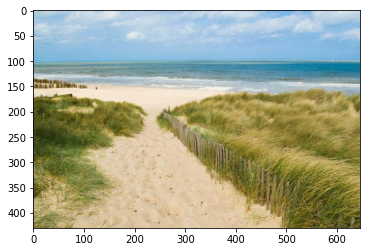

In [21]:
plt.imshow(img)

In [ ]:
print(input_img.shape)

torch.Size([1, 3, 224, 224])


In [45]:
# forward pass
logit = model_1.forward(input_img)
h_x_1 = F.softmax(logit, 1).data.squeeze()
probs_1, idx_1 = h_x_1.sort(0, True)
# print(idx)

print('{} prediction on {}'.format('resnet50',img_name))
# output the prediction
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs_1[i], classes[idx_1[i]]))

resnet50 prediction on 1.jpg
0.576 -> beach
0.201 -> desert/vegetation
0.082 -> coast
0.053 -> ocean
0.021 -> wave


In [ ]:
for name, param in the_model.named_parameters():
    print(name, ':', param.requires_grad)

In [28]:
dummy_input = torch.randn(1, 3, 256, 256)
onnx_path =  "/content/drive/My Drive/00_openvino/resnet50_places365_image_size256.onnx"

torch.onnx.export(model, dummy_input, onnx_path, export_params=True, opset_version=10, verbose=False)
print('Model exported to ' + onnx_path)

Model exported to /content/drive/My Drive/00_openvino/resnet50_places365_image_size256.onnx


In [20]:
onnx_model = onnx.load("/content/drive/My Drive/00_openvino/resnet50_places365_resize256.onnx")
onnx.checker.check_model(onnx_model)

In [21]:
print(type(onnx_model))
print(type(onnx.checker.check_model(onnx_model)))

<class 'onnx.onnx_ONNX_REL_1_7_ml_pb2.ModelProto'>
<class 'NoneType'>


In [26]:
torch_out = model(dummy_input)

In [27]:
import onnxruntime


ort_session = onnxruntime.InferenceSession("/content/drive/My Drive/00_openvino/resnet50_places365_resize256.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(dummy_input)}
ort_outs = ort_session.run(None, ort_inputs)

# compare ONNX Runtime and PyTorch results
np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

Exported model has been tested with ONNXRuntime, and the result looks good!


In [ ]:
dummy_input = torch.randn(1, 3, 256, 256)
onnx_path =  "/content/drive/My Drive/00_openvino/resnet50_places365_.onnx"

torch.onnx.export(model_1, dummy_input, onnx_path, verbose=False)
print('Model exported to ' + onnx_path)

Model exported to /content/drive/My Drive/00_openvino/resnet50_places365_ce.onnx
